In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [ ]:
#Importing all csv files (4 stocks, ETF, and 10yr T-Bill)

In [58]:
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'), 
                index_col = 'Date',
                parse_dates = True,
                infer_datetime_format = True,                      
                     )
shel_df = shel_df["Adj Close"]

In [59]:
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

In [60]:
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

In [61]:
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

In [62]:
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

In [63]:
treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]

In [64]:
#Combining the 4 stocks and ETF into a DataFrame (energy_stocks_df)

In [65]:
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)

In [66]:
display(energy_stocks_df.head())
display(energy_stocks_df.tail())

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-05-01,58.160614,108.933136,171.674988,94.112198,39.707764
2022-06-01,51.797909,87.461830,143.476334,84.815910,33.274773
2022-07-01,52.877651,95.618851,162.305252,95.997269,36.250000
2022-08-01,52.481411,107.415405,156.636765,94.670158,36.900002
2022-09-01,49.759998,100.889244,143.669998,87.309998,33.330002


In [67]:
#Calculating Pct Change for each stock and ETF
energy_stocks_returns = energy_stocks_df.pct_change().dropna()
energy_stocks_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


In [68]:
#Generating Summary Statistics for the Returns 
energy_stocks_returns.describe()

,SHEL,COP,CVX,XOM,IXC
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.003372,0.022062,0.011348,0.009753,0.007550
std,0.083087,0.127172,0.090419,0.095385,0.091319
min,-0.193181,-0.359397,-0.214625,-0.251261,-0.303505
25%,-0.036032,-0.053558,-0.036378,-0.051917,-0.031599
50%,0.007776,0.021637,0.001278,0.013496,0.011879
75%,0.049016,0.087797,0.057910,0.068143,0.047991
max,0.324462,0.399247,0.269666,0.241379,0.289203


<AxesSubplot:title={'center':'Box Plot of Returns'}>

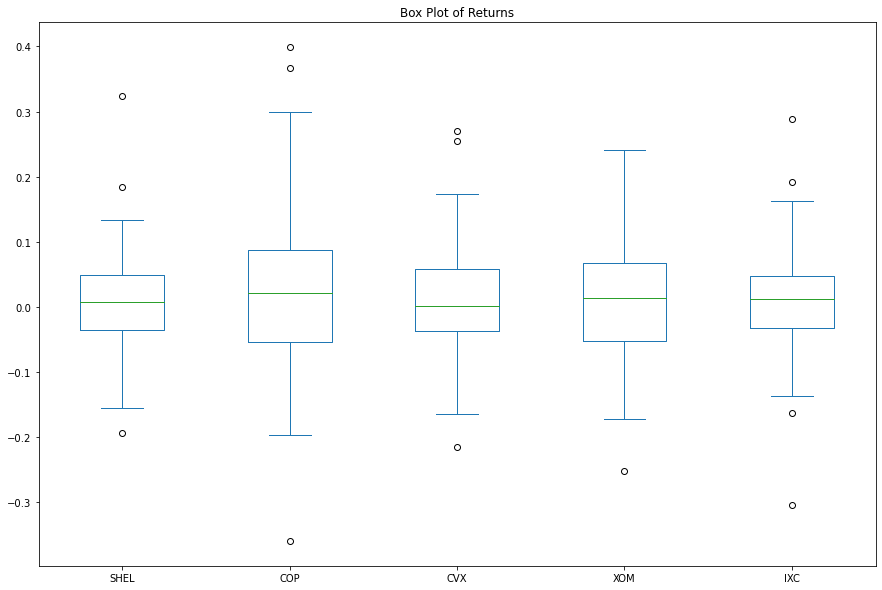

In [69]:
#creating a box plot for the spread/range of returns
energy_stocks_returns.plot.box(figsize=(15,10), title="Box Plot of Returns")

In [70]:
#We can see that SHEL appears to be the least volatile stock, less volatile than the ETF IXC, CVX is second

In [73]:
#Calculating and Annualizing Standard Deviation for Each Stock and ETF
months_in_year = 12
standard_deviation = energy_stocks_returns.std()
annualized_standard_deviation = standard_deviation * np.sqrt(months_in_year) 

print("Standard_Deviations")
standard_deviation.sort_values()

Standard_Deviations


SHEL    0.083087
CVX     0.090419
IXC     0.091319
XOM     0.095385
COP     0.127172
dtype: float64

In [72]:
print("Annualized_Standard_Deviations")
annualized_standard_deviation.sort_values()

Annualized_Standard_Deviations


SHEL    0.287822
CVX     0.313222
IXC     0.316337
XOM     0.330423
COP     0.440538
dtype: float64

In [74]:
#Calculating the Annualized Avg Returns
annualized_energy_stock_returns = energy_stocks_returns.mean() * months_in_year

annualized_energy_stock_returns.sort_values()

SHEL    0.040461
IXC     0.090604
XOM     0.117033
CVX     0.136172
COP     0.264747
dtype: float64

In [88]:
#Get the Risk Free Rate from treasury_df
risk_free_rate = treasury_df.mean() / 100

risk_free_rate 

0.019737833333333326

In [89]:
#Calculate the Sharpe Ratio for each stock and ETF.

sharpe_ratios = (annualized_energy_stock_returns - risk_free_rate) / annualized_standard_deviation

sharpe_ratios

SHEL    0.071999
COP     0.556158
CVX     0.371731
XOM     0.294456
IXC     0.224020
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

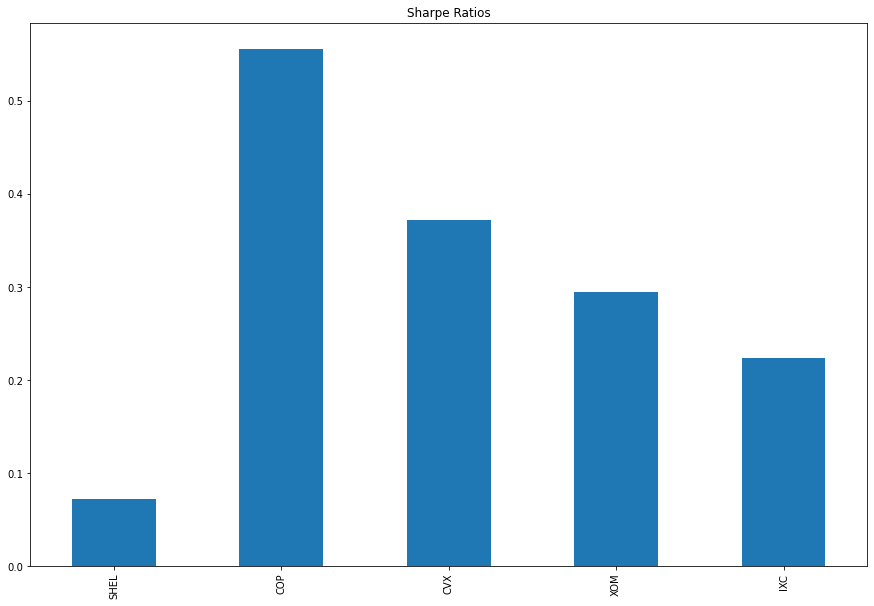

In [91]:
#Plot Sharpe Ratios for each Stock and ETF
sharpe_ratios.plot.bar(figsize=(15,10), title="Sharpe Ratios")

<AxesSubplot:title={'center':'Box Plot of Returns'}>

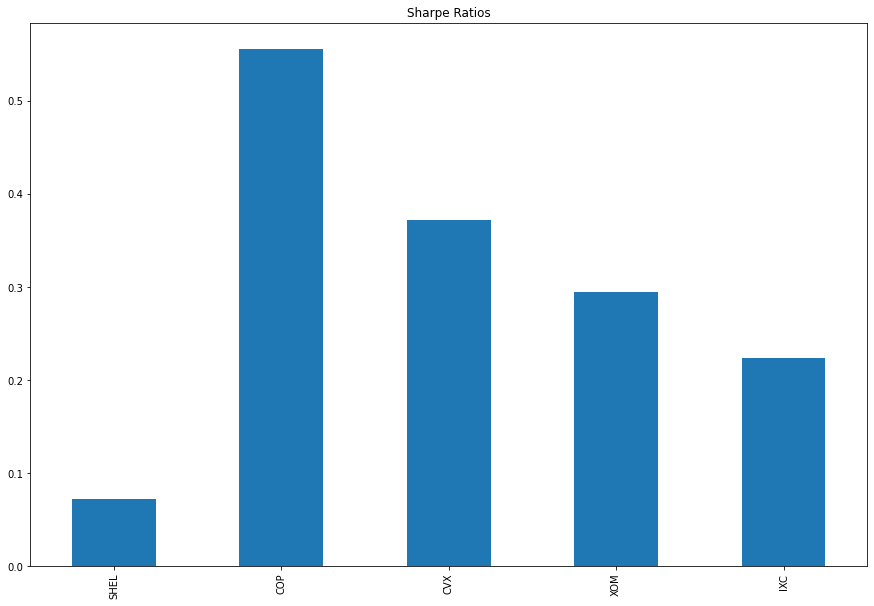

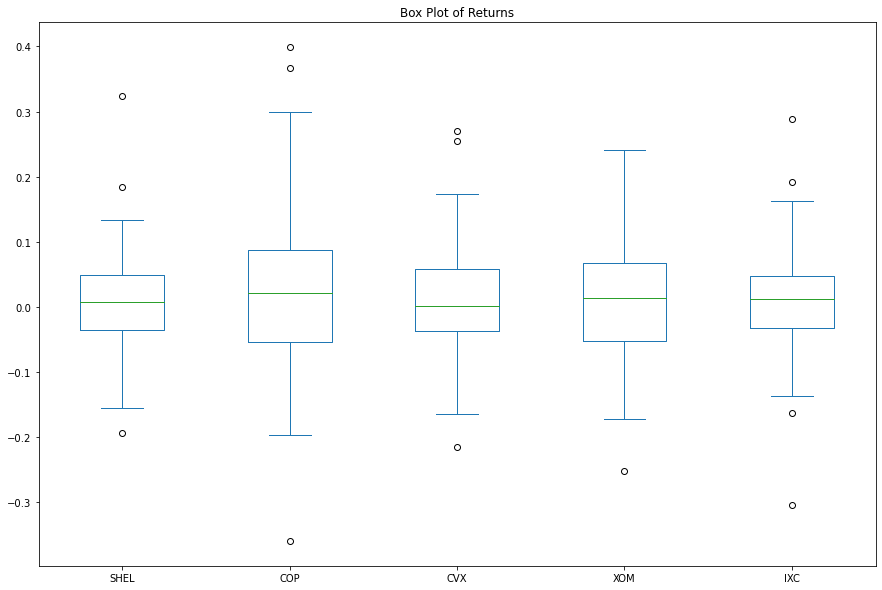

In [92]:
#Analize graphical data and numbers to make a conclusion.
sharpe_ratios.plot.bar(figsize=(15,10), title="Sharpe Ratios")
energy_stocks_returns.plot.box(figsize=(15,10), title="Box Plot of Returns")

In [ ]:
"""We can see that even though SHEL has least volatility,
its Sharpe Ratio is the smallest.
CVX appears to offer a larger Sharpe Ratio than IXC,
while still having a relatively acceptable volatility."""